In [1]:
import numpy as np
import math
from matplotlib import pylab as plt
from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
from root_pandas import read_root
import uproot

filenames_g=[
#             "/work/lb8075/PhaseSpaces/PhS2_10x10_Elec/output*.root",\
            "/work/lb8075/PhaseSpaces/PhS2_10x10_p1_Elec/output*.root",\
#             "/work/lb8075/PhaseSpaces/PhS2_20x20_Elec/output*.root",\
            "/work/lb8075/PhaseSpaces/PhS2_20x20_p1_Elec/output*.root",\
            "/work/lb8075/PhaseSpaces/PhS2_30x30_p1_Elec/output*.root",\
            "/work/lb8075/PhaseSpaces/PhS2_40x40_p1_Elec/output*.root"]


data_frame_dict={}

for files_g in filenames_g:
    print(f"{files_g}   \n")
    ur=uproot.pandas.iterate(files_g, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine'])
    mylist=list(ur)        
    data_frame_dict[files_g]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)



Welcome to JupyROOT 6.22/02
/work/lb8075/PhaseSpaces/PhS2_10x10_p1_Elec/output*.root   

/work/lb8075/PhaseSpaces/PhS2_20x20_p1_Elec/output*.root   

/work/lb8075/PhaseSpaces/PhS2_30x30_p1_Elec/output*.root   

/work/lb8075/PhaseSpaces/PhS2_40x40_p1_Elec/output*.root   



In [2]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['Weight'].value_counts())

0.01    91231
1.00       98
Name: Weight, dtype: int64
0.01    371460
1.00       416
Name: Weight, dtype: int64
0.01    735780
1.00       826
Name: Weight, dtype: int64
0.01    1098436
1.00       1176
Name: Weight, dtype: int64


In [3]:
for files_g in filenames_g:
    print(data_frame_dict[files_g]['X'].count())

91329
371876
736606
1099612


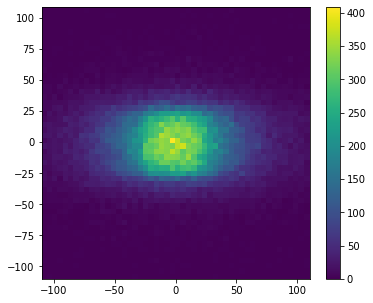

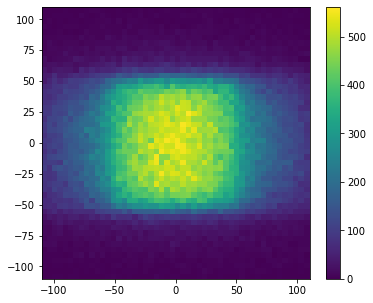

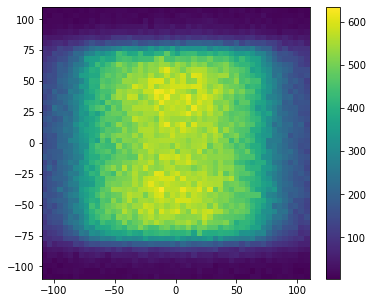

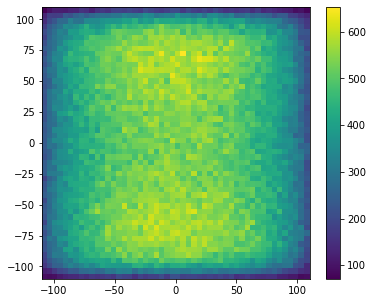

In [4]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(6,5))
    _=plt.hist2d(data_frame_dict[files_g]['X'],data_frame_dict[files_g]['Y'],bins=(50,50))
#     plt.xlim(-100,100)
#     plt.ylim(-100,100)
#     plt.pause(1)
    plt.colorbar()
    plt.show()
#     input("wait")

In [5]:
# import uproot

# file = uproot.open("/work/lb8075/PhaseSpaces/PhS1A_Gamma/output-phs1A_1.root")
# # print(file.keys())
# print(file['PhaseSpace'].keys())

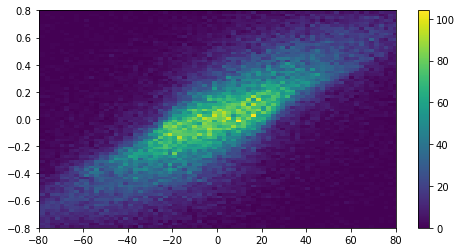

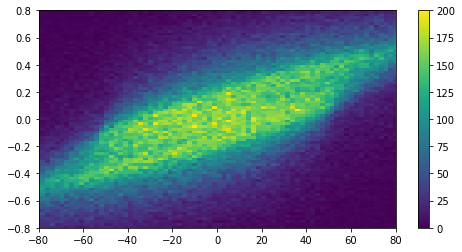

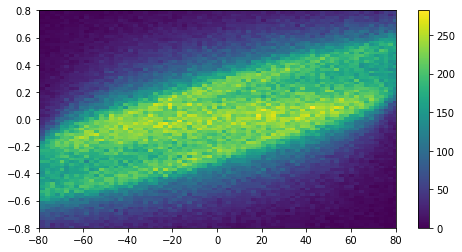

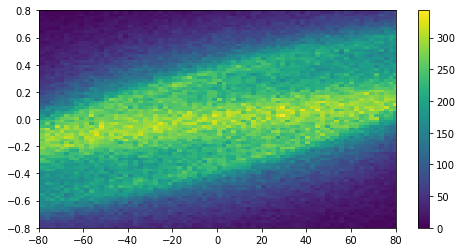

In [7]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(8,4))
#     print(data_frame_dict[files_g]['X'])

    _=plt.hist2d(data_frame_dict[files_g]['X'],data_frame_dict[files_g]['dX'],bins=(100,100))
    plt.xlim(-80,80)
    plt.ylim(-0.8,0.8)
    plt.colorbar()
#     plt.pause(1)
    plt.show()
#     input("wait")


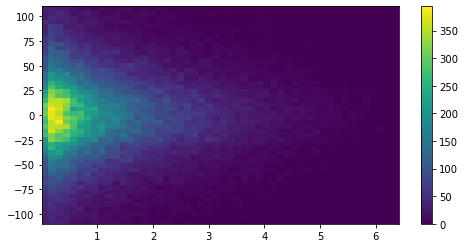

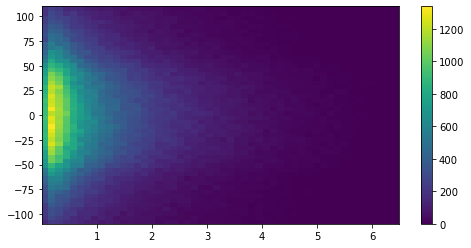

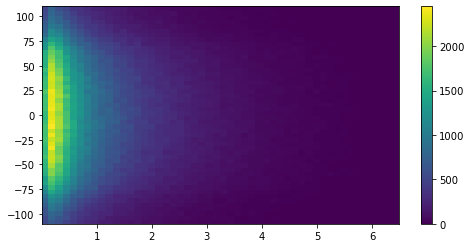

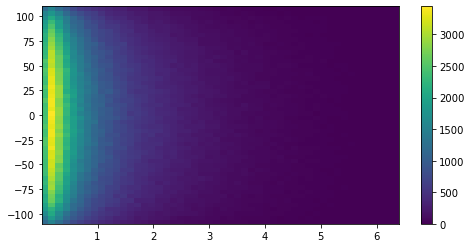

In [8]:
for files_g in filenames_g:
    plt.subplots(1,1,figsize=(8,4))
    _=plt.hist2d(data_frame_dict[files_g]['Ekine'],data_frame_dict[files_g]['X'],bins=(50,50))
#     plt.xlim(-80,80)
#     plt.ylim(-0.7,0.7)
#     plt.pause(1)
    plt.colorbar()
    plt.show()
#     input("wait")


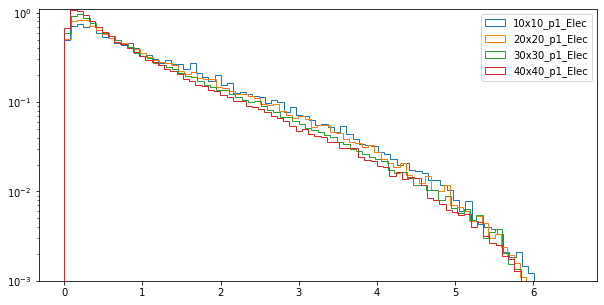

In [10]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
    if "Brem1-" in files_g:
        _=plt.hist(data_frame_dict[files_g]['Ekine'],density=True,weights=data_frame_dict[files_g]['Weight'],histtype='step',bins=(80),label=files_g[30:-13])
    else:
        _=plt.hist(data_frame_dict[files_g]['Ekine'],density=True,weights=data_frame_dict[files_g]['Weight'],histtype='step',bins=(80),label=files_g[30:-13])

plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
plt.ylim(0.001,1.1)
plt.show()


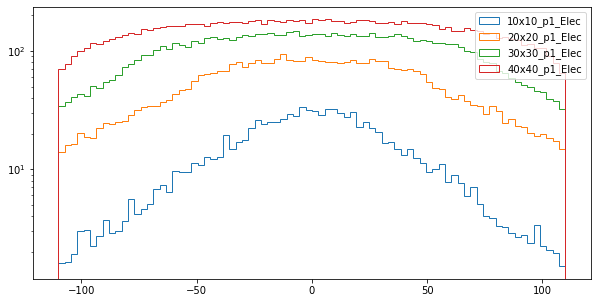

In [11]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
    if "Brem1-" in files_g:
        _=plt.hist(data_frame_dict[files_g]['X'],weights=data_frame_dict[files_g]['Weight'],histtype='step',bins=(80),label=files_g[30:-13])
    else:
        _=plt.hist(data_frame_dict[files_g]['X'],weights=data_frame_dict[files_g]['Weight'],histtype='step',bins=(80),label=files_g[30:-13])

plt.yscale('log')
plt.legend()
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()


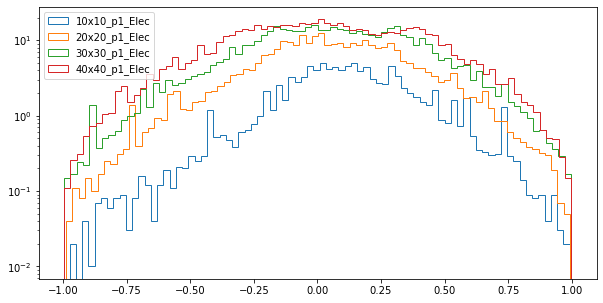

In [12]:
plt.subplots(1,1,figsize=(10,5))

for files_g in filenames_g:
    if "Brem1-" in files_g:
        _=plt.hist(data_frame_dict[files_g]['dX'][data_frame_dict[files_g]['X']<20][data_frame_dict[files_g]['X']>10],weights=data_frame_dict[files_g]['Weight'][data_frame_dict[files_g]['X']<20][data_frame_dict[files_g]['X']>10],histtype='step',bins=(80),label=files_g[30:-13])
    else:
        _=plt.hist(data_frame_dict[files_g]['dX'][data_frame_dict[files_g]['X']<20][data_frame_dict[files_g]['X']>10],weights=data_frame_dict[files_g]['Weight'][data_frame_dict[files_g]['X']<20][data_frame_dict[files_g]['X']>10],histtype='step',bins=(80),label=files_g[30:-13])

plt.yscale('log')
plt.legend(loc="upper left")
# plt.xlim(0,5.8)
# plt.ylim(0.001,1)
plt.show()


In [29]:


# filenames_e=["/work/lb8075/PhaseSpaces/PhS1Elec_tests/output-phs1A_9.root"]
# data_frame_dict={}

# for files_e in filenames_e:
#     print(f"{files_e}   \n")
#     ur=uproot.pandas.iterate(files_e, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine'])
#     mylist=list(ur)        
#     data_frame_dict[files_e]=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)


/work/lb8075/PhaseSpaces/PhS1Elec_tests/output-phs1A_9.root   



FileNotFoundError: [Errno 2] No such file or directory: '/work/lb8075/PhaseSpaces/PhS1Elec_tests/output-phs1A_9.root'

In [ ]:
plt.subplots(1,1,figsize=(10,6))

for files_e in filenames_e:
    labelname=files_e[52:-16]
    print(labelname)
    _=plt.hist(data_frame_dict[files_e]['Ekine'],weights=data_frame_dict[files_e]['Weight'],histtype='step',bins=(150),label=labelname)

plt.legend()
# plt.xlim(0,6.5)
plt.ylim(10,1000)
plt.yscale('log')
plt.show()
